In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df =pd.read_csv('data/Clean_Aviation.csv')

In [6]:
df.head()

Event_Id Accident_Number  Event_Date         Location        Country  \
0  20001218X45444      SEA87LA080  1948-10-24  MOOSE CREEK, ID  United States   
1  20001218X45447      LAX94LA336  1962-07-19   BRIDGEPORT, CA  United States   
2  20061025X01555      NYC07LA005  1974-08-30    SALTVILLE, VA  United States   
3  20001218X45448      LAX96LA321  1977-06-19       EUREKA, CA  United States   
4  20170710X52551      NYC79AA106  1979-09-17       BOSTON, MA  United States   

  Injury_Severity Aircraft_Damage               Make     Model  \
0           Fatal       Destroyed            Stinson     108-3   
1           Fatal       Destroyed              Piper  PA24-180   
2           Fatal       Destroyed             Cessna      172M   
3           Fatal       Destroyed           Rockwell       112   
4       Non-Fatal     Substantial  Mcdonnell douglas       DC9   

  Number_of_Engines    Engine_Type Purpose_of_flight  Total_Fatal_Injuries  \
0               1.0  Reciprocating          Personal                   2.0   
1               1.0  Reciprocating          Personal                   4.0   
2               1.0  Reciprocating          Personal                   3.0   
3               1.0  Reciprocating          Personal                   2.0   
4               2.0      Turbo Fan           Unknown                   0.0   

   Total_Serious_Injuries  Total_Minor_Injuries  Total_Uninjured  \
0                     0.0                   0.0              0.0   
1                     0.0                   0.0              0.0   
2                     0.0                   0.0              0.0   
3                     0.0                   0.0              0.0   
4                     0.0                   1.0             44.0   

  Weather_Condition Phase_of_Flight   Report_Status             Make_Model  
0               UNK          Cruise  Probable Cause          Stinson 108-3  
1               UNK         Unknown  Probable Cause         Piper PA24-180  
2               IMC          Cruise  Probable Cause            Cessna 172M  
3               IMC          Cruise  Probable Cause           Rockwell 112  
4               VMC           Climb  Probable Cause  Mcdonnell douglas DC9

In [7]:
df['Event_Date'] = pd.to_datetime(df['Event_Date'])

# Extract year, month, and day
df['created_year'] = df['Event_Date'].dt.year
df['created_month'] = df['Event_Date'].dt.month
df['created_day'] = df['Event_Date'].dt.day

In [12]:
print(df[['Event_Date', 'created_year', 'created_month', 'created_day']].head())

  Event_Date  created_year  created_month  created_day
0 1948-10-24          1948             10           24
1 1962-07-19          1962              7           19
2 1974-08-30          1974              8           30
3 1977-06-19          1977              6           19
4 1979-09-17          1979              9           17


In [8]:
#find the initial year
first_year = df['created_year'].min()
first_year

1948

In [9]:
#between 1958 and 1980 : Filter accidents between 1948 and 1980
filtered_df = df[(df['created_year'] >= 1948) & (df['created_year'] <= 1980)]
# Display the filtered DataFrame
print(filtered_df[['Event_Date', 'created_year']].head(10))

  Event_Date  created_year
0 1948-10-24          1948
1 1962-07-19          1962
2 1974-08-30          1974
3 1977-06-19          1977
4 1979-09-17          1979


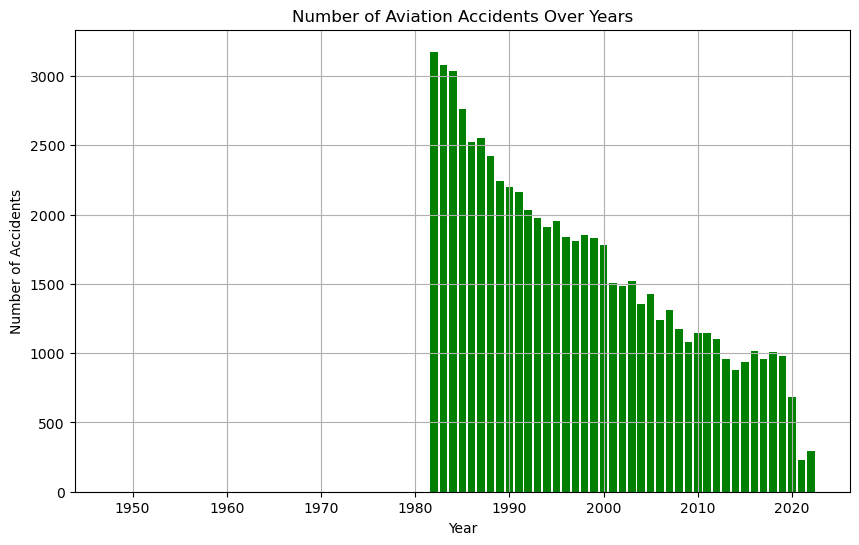

In [10]:
# Count the number of accidents per year
accidents_per_year = df['created_year'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(accidents_per_year.index, accidents_per_year.values, color='green')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Aviation Accidents Over Years')
plt.grid(True)
plt.show()

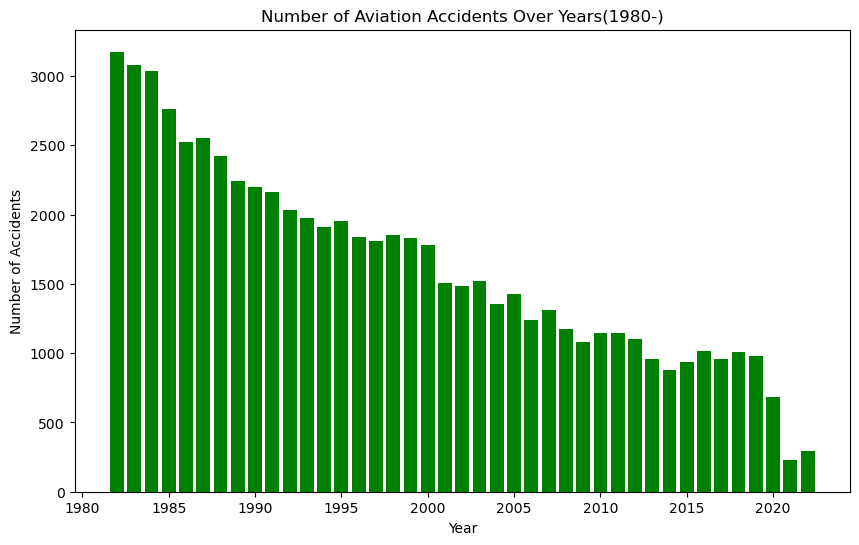

In [40]:
#filter accidents from 1980 onwards
filtered_df = df[df['created_year'] >= 1982]

# Count the number of accidents per year
accidents_per_year = filtered_df['created_year'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(accidents_per_year.index, accidents_per_year.values, color='green')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Aviation Accidents Over Years(1980-)')
#plt.grid(True)
plt.show()

## observations




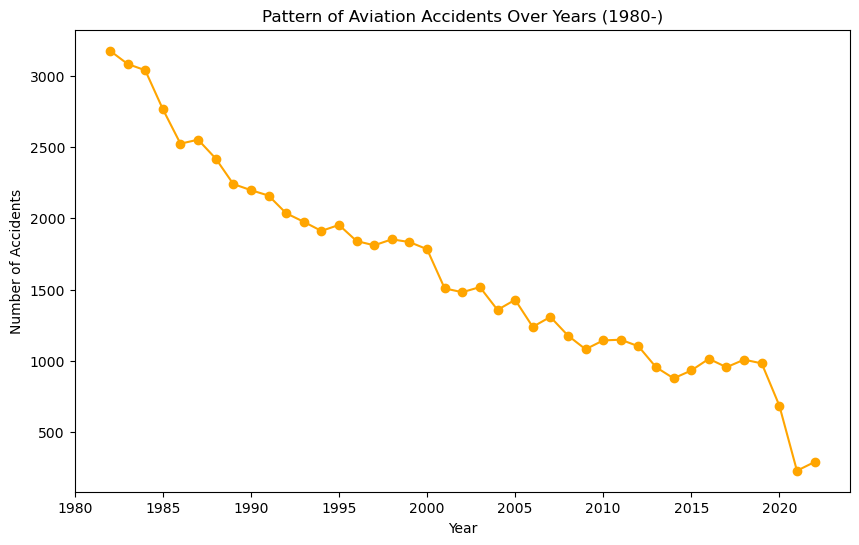

In [12]:
# Plot the data as a line graph
plt.figure(figsize=(10, 6))
plt.plot(accidents_per_year.index, accidents_per_year.values, marker='o', linestyle='-', color='orange')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Pattern of Aviation Accidents Over Years (1980-)')
#plt.grid(True)
plt.show()

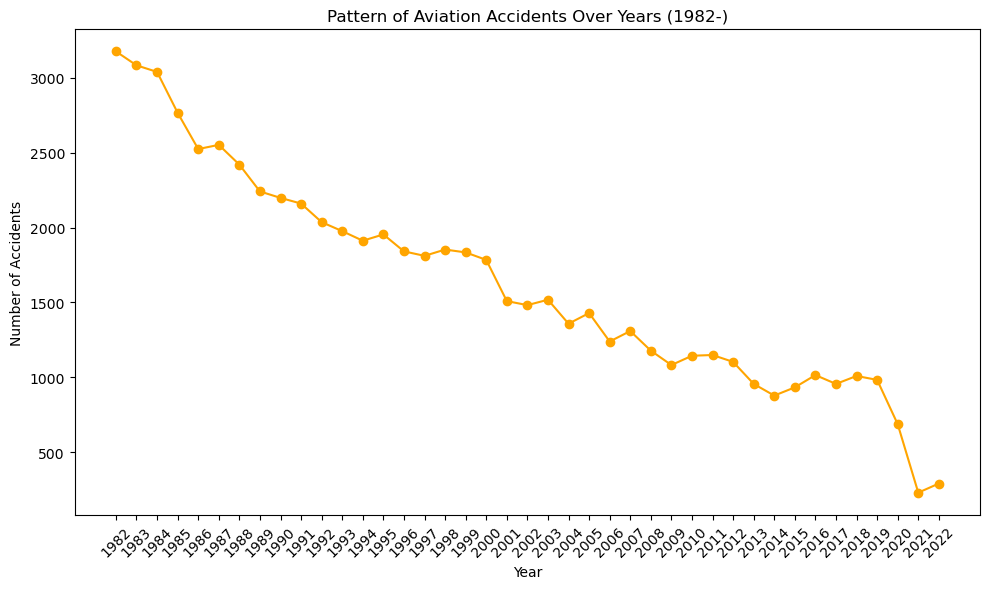

In [41]:

# Plot the data as a line graph
plt.figure(figsize=(10, 6))
plt.plot(accidents_per_year.index, accidents_per_year.values, marker='o', linestyle='-', color='orange')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Pattern of Aviation Accidents Over Years (1982-)')
plt.xticks(accidents_per_year.index, rotation=45)  # Adjust x-axis ticks
#plt.grid(True)
plt.tight_layout()  # To prevent clipping of labels
plt.show()

<Figure size 1200x600 with 0 Axes>

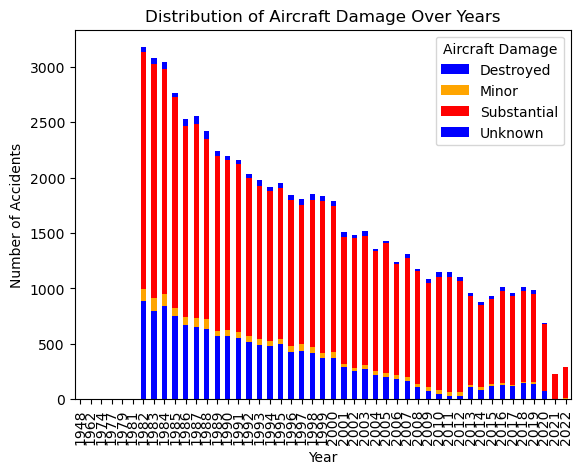

In [51]:
# Group data by year and aircraft damage
grouped_data = df.groupby(['created_year', 'Aircraft_Damage']).size().unstack()

# Plot the data as a stacked bar plot
plt.figure(figsize=(12, 6))
grouped_data.plot(kind='bar', stacked=True, color=['blue', 'orange', 'red'])
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Distribution of Aircraft Damage Over Years')
plt.legend(title='Aircraft Damage')
#plt.grid(True)
plt.show()

#make suplot 

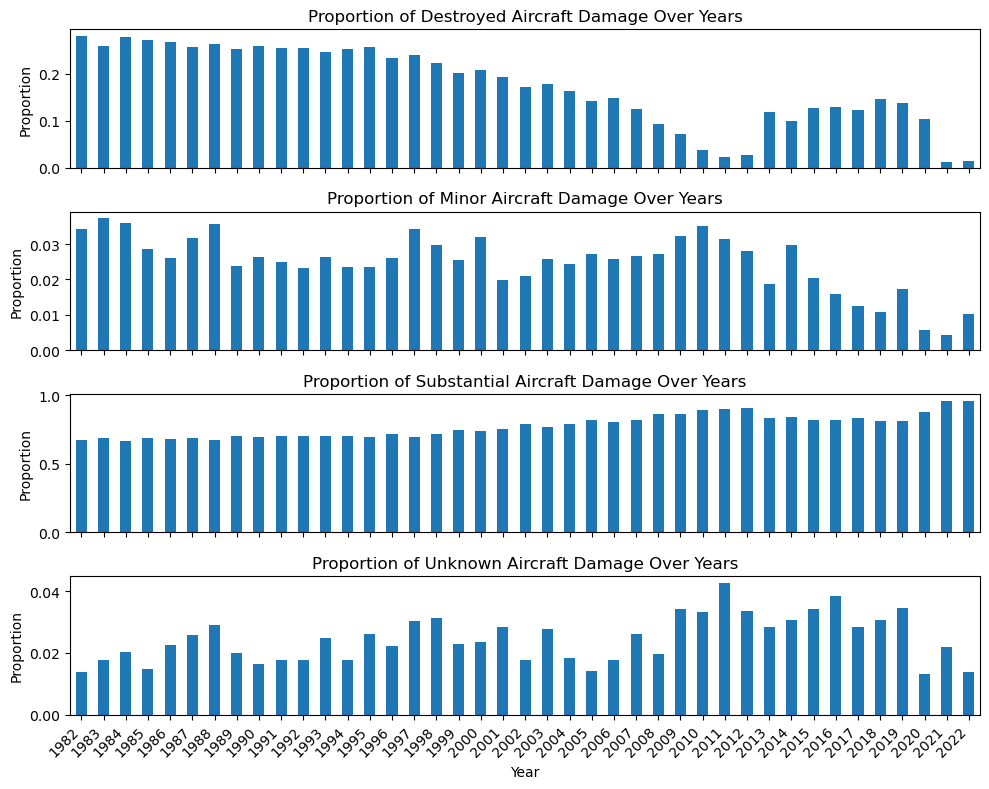

In [21]:
# Filter data for years after 1982
df_filtered = df[df['created_year'] >= 1982]

# Group data by year and calculate total accidents
total_accidents_per_year = df_filtered.groupby('created_year').size()

# Group data by year and aircraft damage, and calculate proportions
grouped_data = df_filtered.groupby(['created_year', 'Aircraft_Damage']).size().unstack()
grouped_data = grouped_data.div(total_accidents_per_year, axis=0)

# Create subplots for each aircraft damage type
damage_types = grouped_data.columns
num_damage_types = len(damage_types)

fig, axes = plt.subplots(nrows=num_damage_types, ncols=1, figsize=(10, 8), sharex=True)

for i, damage_type in enumerate(damage_types):
    ax = axes[i]
    grouped_data[damage_type].plot(kind='bar', stacked=True, ax=ax)
    ax.set_ylabel('Proportion')
    ax.set_title(f'Proportion of {damage_type} Aircraft Damage Over Years')
    #ax.legend(title='Year', labels=grouped_data.index)
    ax.grid(False)

plt.xlabel('Year')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [23]:
# Create a contingency table
contingency_table = pd.crosstab(df['Aircraft_Damage'], 
                                 [df['Total_Fatal_Injuries'], df['Total_Serious_Injuries'], df['Total_Minor_Injuries'], df['Total_Uninjured']], 
                                 rownames=['Aircraft Damage'], colnames=['Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured'])

print(contingency_table)

Total_Fatal_Injuries   0.0                                                     \
Total_Serious_Injuries  0.0                                                     
Total_Minor_Injuries    0.0                                                     
Total_Uninjured          0.0    1.0    2.0   3.0   4.0  5.0  6.0  7.0 8.0 9.0   
Aircraft Damage                                                                 
Destroyed                 18    854    428   115    53   16    5   10   1   0   
Minor                     76    197    237   184   108   61   42   29  19  13   
Substantial               61  16509  11548  2983  2015  558  285  134  66  52   
Unknown                  106     55     71    51    19   14    8   14   7   4   

Total_Fatal_Injuries    ... 169.0 174.0 189.0 217.0 228.0 229.0 230.0 256.0  \
Total_Serious_Injuries  ...  0.0   0.0   0.0   0.0   26.0  0.0   0.0   0.0    
Total_Minor_Injuries    ...  10.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0    
Total_Uninjured         ...   0.0

C:\Users\denii\AppData\Local\Temp\ipykernel_12620\828030766.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

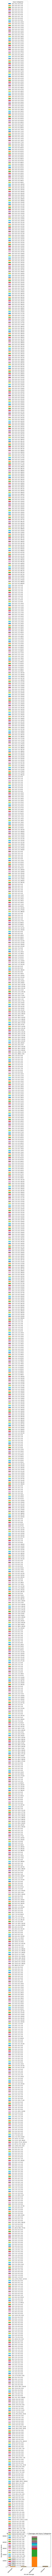

In [36]:

#contingency_table = pd.crosstab(df['Aircraft_Damage'], 
                                # [df['Total_Fatal_Injuries'], df['Total_Serious_Injuries'], df['Total_Minor_Injuries'], df['Total_Uninjured']], 
                                 #rownames=['Aircraft Damage'], colnames=['Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured'])

# Plot the data as a stacked bar plot
#plt.figure(figsize=(10, 6))
#contingency_table.plot(kind='bar', stacked=True)
#plt.title('Relationship Between Aircraft Damage and Injury Categories')
#plt.xlabel('Aircraft Damage')
#plt.ylabel('Number of Accidents')
#plt.xticks(rotation=45, ha='right')
#plt.legend(title='Injury Categories')
#plt.tight_layout()
#plt.show()

#  Aircraft damage vs. Injuries


<Figure size 1000x600 with 0 Axes>

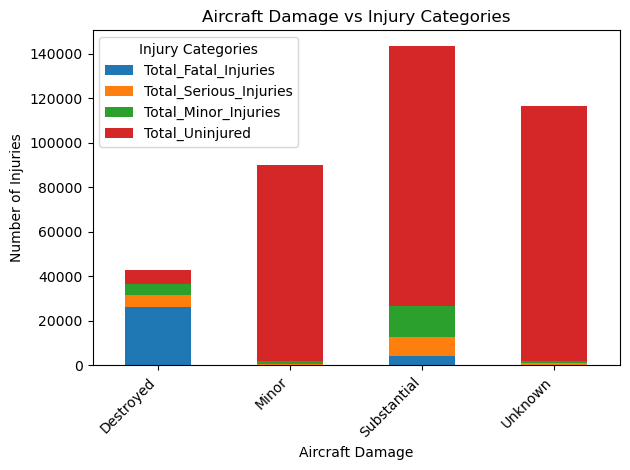

In [39]:
# Create a subset of relevant columns
subset_columns = ['Aircraft_Damage', 'Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured']
df_subset = df[subset_columns]

# Group the data by 'Aircraft_Damage' and calculate the sum of injuries
grouped_data = df_subset.groupby('Aircraft_Damage').sum()

# Plot the data as a stacked bar plot
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=True)
plt.title('Aircraft Damage vs Injury Categories')
plt.xlabel('Aircraft Damage')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Injury Categories')
plt.tight_layout()
plt.show()